In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the CSV file 
housedf = pd.read_csv("california_house_dataset_handled.csv")
housedf.head(5)

,X0,encoded_ocean_proximity,longitude,latitude,housing_median_age,population,median_income,median_house_value
0,1,1,-122.23,37.88,41,322,8.3252,452600
1,1,1,-122.22,37.86,21,2401,8.3014,358500
2,1,1,-122.24,37.85,52,496,7.2574,352100
3,1,1,-122.25,37.85,52,558,5.6431,341300
4,1,1,-122.25,37.85,52,565,3.8462,342200


In [10]:
# STEP 2: Make a clean copy and drop unused columns
df = housedf.copy()
df = df.drop(columns=['X0'])  # Not useful for modeling
df.head(5)


,encoded_ocean_proximity,longitude,latitude,housing_median_age,population,median_income,median_house_value
0,1,-122.23,37.88,41,322,8.3252,452600
1,1,-122.22,37.86,21,2401,8.3014,358500
2,1,-122.24,37.85,52,496,7.2574,352100
3,1,-122.25,37.85,52,558,5.6431,341300
4,1,-122.25,37.85,52,565,3.8462,342200


In [ ]:
# STEP 3: Handling missing values
df = df.dropna()
#df

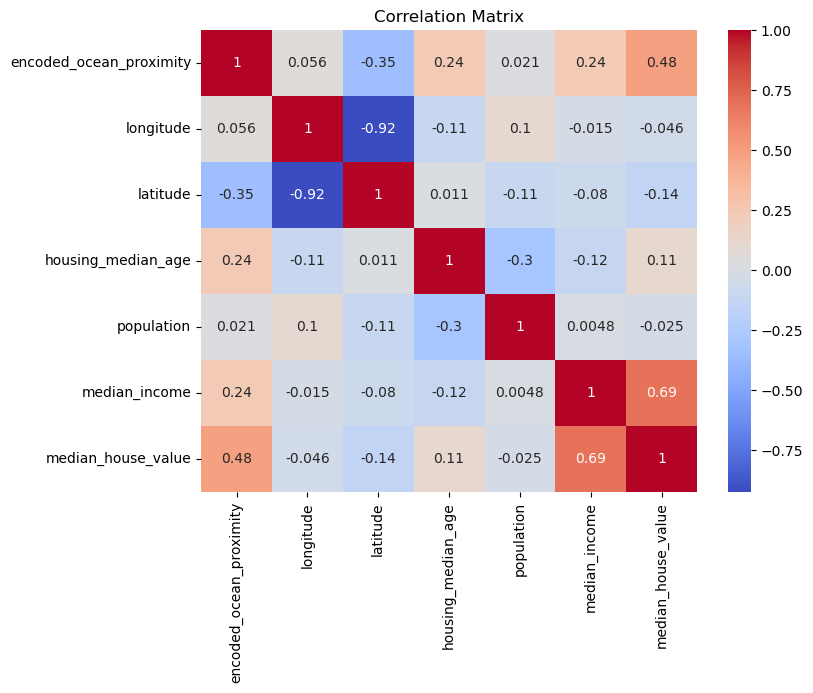

In [12]:
# STEP 4: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

mi = mutual_info_regression(X, y)
for col, score in zip(X.columns, mi):
    print(f"{col}: {score:.4f}")

encoded_ocean_proximity: 0.1938
longitude: 0.4013
latitude: 0.3699
housing_median_age: 0.0303
population: 0.0213
median_income: 0.3875


In [14]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  R² score: {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print("-" * 30)

Linear Regression:
  R² score: 0.5929
  RMSE: 73036.86
  MAE: 52988.31
------------------------------
Decision Tree:
  R² score: 0.6751
  RMSE: 65244.78
  MAE: 40990.16
------------------------------
Random Forest:
  R² score: 0.8158
  RMSE: 49130.60
  MAE: 31689.84
------------------------------


In [15]:
#Cross validating
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"{name} CV R² mean: {scores.mean():.4f} | std: {scores.std():.4f}")


Linear Regression CV R² mean: 0.5534 | std: 0.0828
Decision Tree CV R² mean: 0.0983 | std: 0.2693
Random Forest CV R² mean: 0.4554 | std: 0.2105


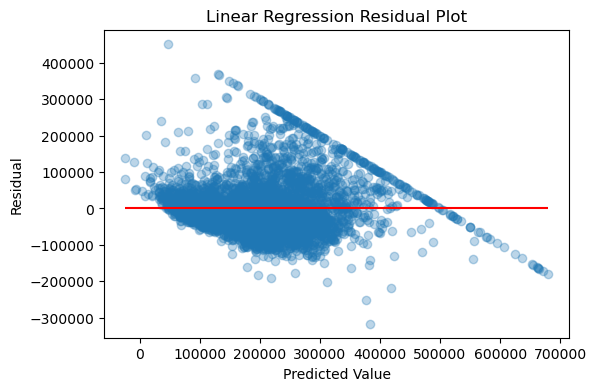

In [16]:
import matplotlib.pyplot as plt

# Fit linear regression again on the train/test split
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Linear Regression Residual Plot')
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

r2 = r2_score(y_test, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression (deg=2): R² = {r2:.4f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}")


Polynomial Regression (deg=2): R² = 0.6242, RMSE = 70170.82, MAE = 50078.67


In [18]:
poly_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('lr', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

r2 = r2_score(y_test, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression (deg=3): R² = {r2:.4f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}")


Polynomial Regression (deg=3): R² = 0.6551, RMSE = 67228.34, MAE = 47158.20


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("Best R² (CV): ", search.best_score_)
print("Best parameters: ", search.best_params_)


c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\fahad\anaconda3\Lib\site-packages

Best R² (CV):  0.8187277624204636
Best parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
best_rf = search.best_estimator_

# Predict on test
y_pred = best_rf.predict(X_test)

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Tuned Random Forest R²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Tuned Random Forest R²: 0.8132, RMSE: 49478.48, MAE: 32094.04
